In [10]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

from IPython.display import Image
import graphviz
import pydotplus 

pd.options.display.max_columns = 25

# Iris dataset

In [11]:
df_iris = pd.read_csv("iris.csv")

In [12]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
target = "Species"
features = [i for i in df_iris if i != target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_iris[features], df_iris[target], random_state=42) 
tree_class = tree.DecisionTreeClassifier(random_state=0)
tree_class.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [15]:
print("Правильность на обучающем наборе: {:.3f}".format(tree_class.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree_class.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 1.000


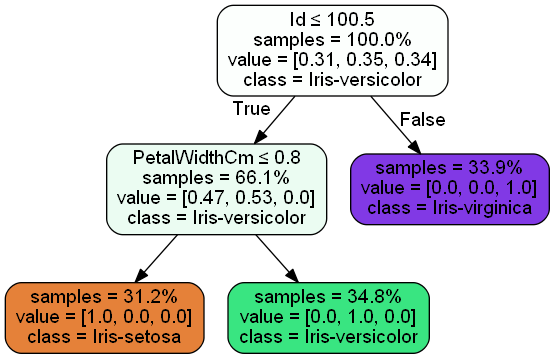

In [23]:
dot_data = tree.export_graphviz(decision_tree=tree_class, out_file="tree.out",
                                max_depth=5,
                                feature_names=features,
                                class_names=df_iris[target].unique(),
                                filled=True, rounded=True,  
                                special_characters=True,
                                proportion = True, precision=2,
                                label='all', impurity=False,
)  

graph = pydotplus.graphviz.graph_from_dot_file("tree.out")
Image(graph.create_png())

# Austin Weather

In [28]:
df_austin = pd.read_csv("austin_weather.csv")
df_austin['Events'].replace(' ', np.nan, inplace=True)
df_austin['Events'].fillna('clear', inplace=True)

In [29]:
df_austin.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,clear
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,clear
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,clear
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,clear


In [30]:
df_austin.Events.unique()

array(['Rain , Thunderstorm', 'clear', 'Rain', 'Fog', 'Rain , Snow',
       'Fog , Rain', 'Thunderstorm', 'Fog , Rain , Thunderstorm',
       'Fog , Thunderstorm'], dtype=object)

In [31]:
austin_target = "Events"
austin_features = [i for i in df_austin if i != "Events"]

In [8]:
# dot_data = tree.export_graphviz(decision_tree=tree_class, out_file="tree.out",
#                                    max_depth=5,
#                                    feature_names=features,
#                                    class_names=df_iris[target].unique(),
#                                    filled=True, rounded=True,  
#                                    special_characters=True,
#                                    proportion = True, precision=2,
#                                    label='all', impurity=False,
#                                   )  
#
# graph = pydotplus.graphviz.graph_from_dot_file("tree.out")
# Image(graph.create_png())

InvocationException: GraphViz's executables not found